#Question 1

We can derive the variance decomposition using the two given equations:
$E[MSE] = Bias^2 + V ariance + Noise$ <br>
and <br>
$y=f(x)+\epsilon$
<br>We also know: <br>
$MSE = \mathbb{E}[(y-\hat{f}(x))^2]$
<br>
$bias[\hat{f}(x)]=\mathbb{E}[\hat{f}(x)]-f(x)$

$var(\hat{f}(x)) = \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]^2]$
<br>Expanding: <br>
$MSE = \mathbb{E}[(y-\hat{f}(x))^2] = \mathbb{E}[(f(x)+\epsilon -\hat{f}(x))^2]$
<br>
$MSE =\mathbb{E}[f(x)-\hat{f}(x))^2]+\mathbb{E}[\epsilon^2]+2\mathbb{E}[(f(x)-\hat{f}(x))\epsilon]$
<br>
$MSE=\mathbb{E}[f(x)-\hat{f}(x))^2] + \sigma^2_\epsilon, \text{(since $\mathbb{E}[\epsilon]=0$)}$
<br><br>
$\mathbb{E}[f(x)-\hat{f}(x))^2]=\mathbb{E}[((f(x)-\mathbb{E}[\hat{f}(x)])-(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]))^2]$
<br><br>
$=\mathbb{E}[(\mathbb{E}[\hat{f}(x)-f(x))^2]+\mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]
-2\mathbb{E}[(f(x)-\mathbb{E}\hat{f}(x)])(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]$
<br><br>
$=\mathbb{E}[\hat{f}(x)-f(x))^2]+\mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]
-2(f(x)-\mathbb{E}[\hat{f}(x)]) \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])]$
<br><br>
$\mathbb{E}[f(x)-\hat{f}(x))^2]=bias[\hat{f}(x)]^2 + var(\hat{f}(x))$
<br><br>
$MSE = \mathbb{E}[(y-\hat{f}(x))^2] = bias[\hat{f}(x)]^2 + var(\hat{f}(x)) + \sigma^2_\epsilon$

1.2)

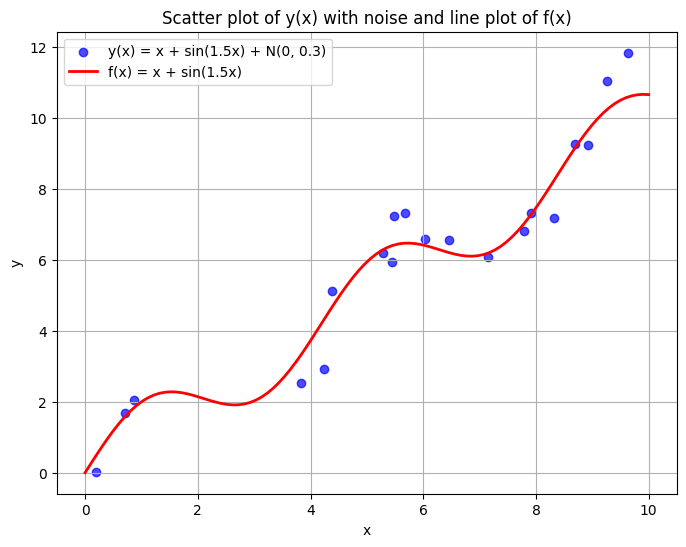

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x + np.sin(1.5 * x)


np.random.seed(0)  # For reproducibility
x_data = np.random.uniform(0, 10, 20)


noise = np.random.normal(0, np.sqrt(0.3), size=x_data.shape)


y_data = f(x_data) + noise


x_smooth = np.linspace(0, 10, 100)
y_smooth = f(x_smooth)


plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='blue', label='y(x) = x + sin(1.5x) + N(0, 0.3)', alpha=0.7)
plt.plot(x_smooth, y_smooth, color='red', label='f(x) = x + sin(1.5x)', linewidth=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y(x) with noise and line plot of f(x)')
plt.legend()
plt.grid(True)


plt.show()


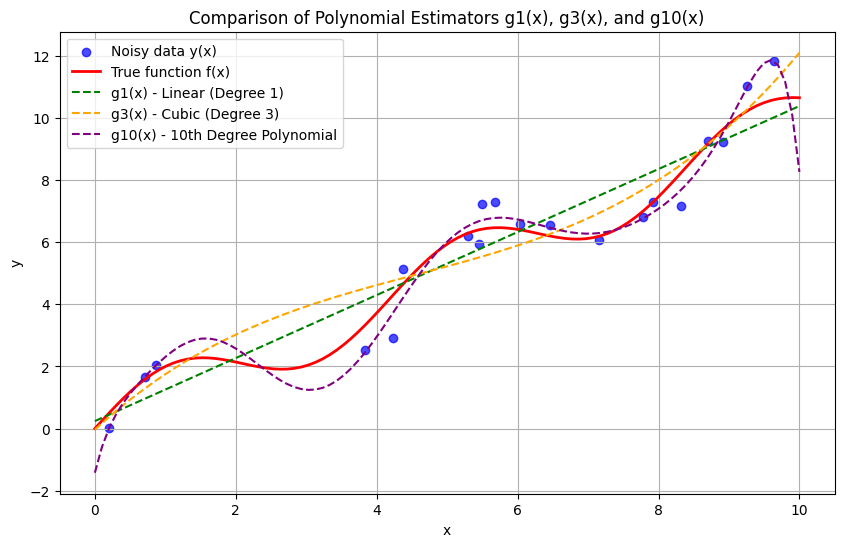

In [2]:



coeff_g1 = np.polyfit(x_data, y_data, 1)
coeff_g3 = np.polyfit(x_data, y_data, 3)
coeff_g10 = np.polyfit(x_data, y_data, 10)


g1_smooth = np.polyval(coeff_g1, x_smooth)
g3_smooth = np.polyval(coeff_g3, x_smooth)
g10_smooth = np.polyval(coeff_g10, x_smooth)


f_smooth = f(x_smooth)


plt.figure(figsize=(10, 6))


plt.scatter(x_data, y_data, color='blue', label='Noisy data y(x)', alpha=0.7)


plt.plot(x_smooth, f_smooth, color='red', label='True function f(x)', linewidth=2)


plt.plot(x_smooth, g1_smooth, color='green', label='g1(x) - Linear (Degree 1)', linestyle='--')
plt.plot(x_smooth, g3_smooth, color='orange', label='g3(x) - Cubic (Degree 3)', linestyle='--')
plt.plot(x_smooth, g10_smooth, color='purple', label='g10(x) - 10th Degree Polynomial', linestyle='--')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Polynomial Estimators g1(x), g3(x), and g10(x)')
plt.legend()
plt.grid(True)


plt.show()


Based on the chart above, it is clear that g1 and g3 are underfitting, while g10 is overfitting.

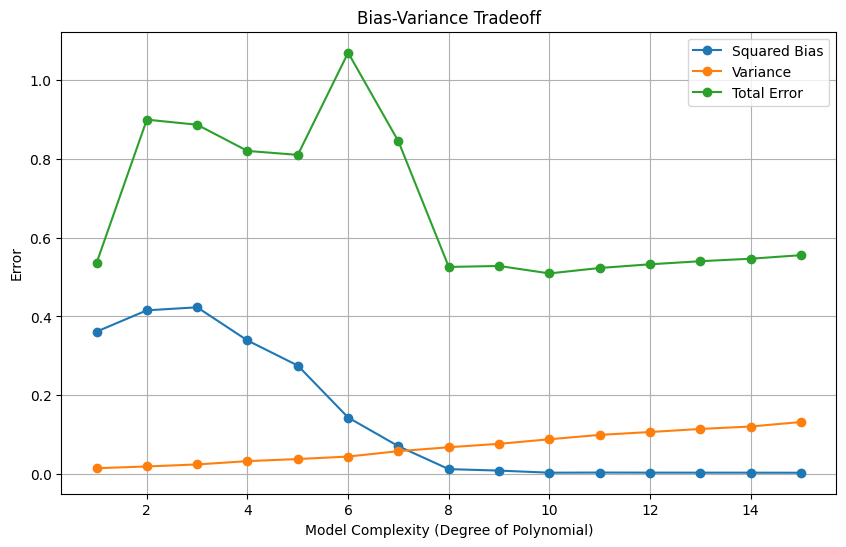

The best model has degree 10 with minimum total error.


In [5]:

from sklearn.model_selection import train_test_split


def generate_dataset(x, noise_variance=0.3):
    noise = np.random.normal(0, np.sqrt(noise_variance), size=x.shape)
    y = f(x) + noise
    return y


def fit_polynomials(x_train, y_train, degrees):
    models = {}
    for degree in degrees:
        coeff = np.polyfit(x_train, y_train, degree)
        models[degree] = coeff
    return models


def evaluate_models(models, x_test):
    predictions = {}
    for degree, coeff in models.items():
        pred = np.polyval(coeff, x_test)
        predictions[degree] = pred
    return predictions

def calculate_bias_variance_error(f_test, predictions, y_test):
    squared_bias = {}
    variance = {}
    error = {}

    for degree, preds in predictions.items():

        avg_pred = np.mean(preds, axis=0)


        squared_bias[degree] = np.mean((avg_pred - f_test) ** 2)

        variance[degree] = np.mean(np.var(preds, axis=0))


        error[degree] = np.mean((y_test - preds) ** 2)

    return squared_bias, variance, error


np.random.seed(0)
num_datasets = 100
degrees = range(1, 16)  # Models g1 to g15
train_size = 40
test_size = 10


x = np.linspace(0, 10, train_size + test_size)


x_train, x_test = train_test_split(x, test_size=test_size, random_state=0)


f_test = f(x_test)


squared_bias_results = {degree: [] for degree in degrees}
variance_results = {degree: [] for degree in degrees}
error_results = {degree: [] for degree in degrees}


all_predictions = {degree: [] for degree in degrees}


for _ in range(num_datasets):

    y_train = generate_dataset(x_train)

    # Fit polynomial models of degree 1 to 15
    models = fit_polynomials(x_train, y_train, degrees)


    predictions = evaluate_models(models, x_test)


    for degree in degrees:
        all_predictions[degree].append(predictions[degree])


stacked_predictions = {degree: np.stack(all_predictions[degree]) for degree in degrees}


y_test = generate_dataset(x_test)

# Calculate bias, variance, and error
squared_bias, variance, error = calculate_bias_variance_error(f_test, stacked_predictions, y_test)


for degree in degrees:
    squared_bias_results[degree].append(squared_bias[degree])
    variance_results[degree].append(variance[degree])
    error_results[degree].append(error[degree])


avg_squared_bias = [np.mean(squared_bias_results[degree]) for degree in degrees]
avg_variance = [np.mean(variance_results[degree]) for degree in degrees]
avg_error = [np.mean(error_results[degree]) for degree in degrees]


plt.figure(figsize=(10, 6))
plt.plot(degrees, avg_squared_bias, label='Squared Bias', marker='o')
plt.plot(degrees, avg_variance, label='Variance', marker='o')
plt.plot(degrees, avg_error, label='Total Error', marker='o')
plt.xlabel('Model Complexity (Degree of Polynomial)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


best_degree = degrees[np.argmin(avg_error)]
print(f"The best model has degree {best_degree} with minimum total error.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93766e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93766e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93766e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93766e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

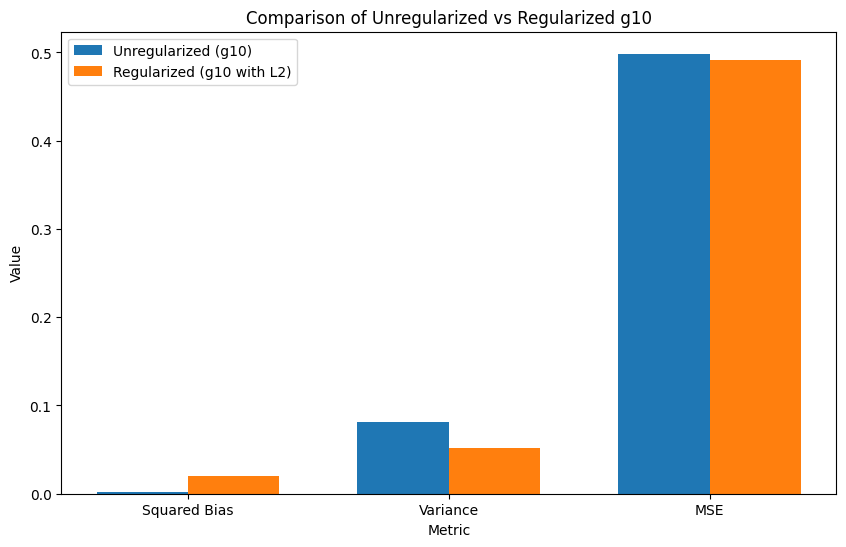

Unregularized Model (g10): Bias^2=0.0014, Variance=0.0809, MSE=0.4985
Regularized Model (g10 with L2): Bias^2=0.0200, Variance=0.0514, MSE=0.4917


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    return x + np.sin(1.5 * x)


def generate_dataset(x, noise_variance=0.3):
    noise = np.random.normal(0, np.sqrt(noise_variance), size=x.shape)
    y = f(x) + noise
    return y

# Fit unregularized polynomial (degree 10)
def fit_unregularized_polynomial(x_train, y_train, degree=10):
    coeff = np.polyfit(x_train, y_train, degree)
    return coeff

# Fit regularized polynomial using Ridge Regression
def fit_regularized_polynomial(x_train, y_train, degree=10, alpha=1.0):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha, fit_intercept=True))
    model.fit(x_train[:, np.newaxis], y_train)
    return model


def evaluate_unregularized_model(coeff, x_test):
    return np.polyval(coeff, x_test)


def evaluate_regularized_model(model, x_test):
    return model.predict(x_test[:, np.newaxis])


def calculate_bias_variance_error(f_test, predictions, y_test):
    avg_pred = np.mean(predictions, axis=0)  # Mean prediction across datasets for bias calculation
    squared_bias = np.mean((avg_pred - f_test) ** 2)  # Bias^2: difference from true f(x)
    variance = np.mean(np.var(predictions, axis=0))  # Variance: variability across datasets
    error = np.mean((y_test - predictions) ** 2)  # Total error (MSE): difference from noisy y(x)
    return squared_bias, variance, error


np.random.seed(0)
num_datasets = 100
degree = 10
train_size = 40
test_size = 10
alpha = 1.0  # Regularization strength for Ridge regression


x = np.linspace(0, 10, train_size + test_size)


x_train, x_test = train_test_split(x, test_size=test_size, random_state=0)


f_test = f(x_test)


all_predictions_unreg = []
all_predictions_reg = []


for _ in range(num_datasets):

    y_train = generate_dataset(x_train)

    y_test = generate_dataset(x_test)

    ### Unregularized model
    coeff_unreg = fit_unregularized_polynomial(x_train, y_train, degree)
    predictions_unreg = evaluate_unregularized_model(coeff_unreg, x_test)

    ### Regularized model
    model_reg = fit_regularized_polynomial(x_train, y_train, degree, alpha=alpha)
    predictions_reg = evaluate_regularized_model(model_reg, x_test)


    all_predictions_unreg.append(predictions_unreg)
    all_predictions_reg.append(predictions_reg)


all_predictions_unreg = np.stack(all_predictions_unreg)
all_predictions_reg = np.stack(all_predictions_reg)


y_test = generate_dataset(x_test)


bias_unreg, var_unreg, err_unreg = calculate_bias_variance_error(f_test, all_predictions_unreg, y_test)


bias_reg, var_reg, err_reg = calculate_bias_variance_error(f_test, all_predictions_reg, y_test)


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(3)


unreg_vals = [bias_unreg, var_unreg, err_unreg]
reg_vals = [bias_reg, var_reg, err_reg]

plt.bar(index, unreg_vals, bar_width, label='Unregularized (g10)')
plt.bar(index + bar_width, reg_vals, bar_width, label='Regularized (g10 with L2)')


plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comparison of Unregularized vs Regularized g10')
plt.xticks(index + bar_width / 2, ['Squared Bias', 'Variance', 'MSE'])
plt.legend()

plt.show()


print(f"Unregularized Model (g10): Bias^2={bias_unreg:.4f}, Variance={var_unreg:.4f}, MSE={err_unreg:.4f}")
print(f"Regularized Model (g10 with L2): Bias^2={bias_reg:.4f}, Variance={var_reg:.4f}, MSE={err_reg:.4f}")


The regularized model has higher bias and lower variance and (slightly) lower MSE.

# Question 2

2.1) True negatives are relevant to ROC curves but are not part of the computation of PR curves, which makes PR curves more sensitive to the performance on positive examples in imbalanced datasets. That said, there is a one-to-one correspondence between ROC and PR curves based on the fact that both types of curves are derived from the same confusion matrix. As long as Recall ≠ 0, each point in ROC space can be mapped to a unique point in PR space, and vice versa​. Therefore, given a fixed confusion matrix, the relationship between these spaces is straightforward and one-to-one.

This equivalence ensures that if a model performs better (dominates) in ROC space, it will also perform better in PR space.

In [10]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=9396f5002a00a2acc7a4d3de64cfb574d0dbc4ae0450c7341473ee5cb2706f16
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=ec86de14e4ac39f3976a8522f33c2566c9f99f1609a460c561921aa3dcbb5f76
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


<ipython-input-13-5819e04eaf35>:12: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(31)  # 'Credit-G' dataset
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

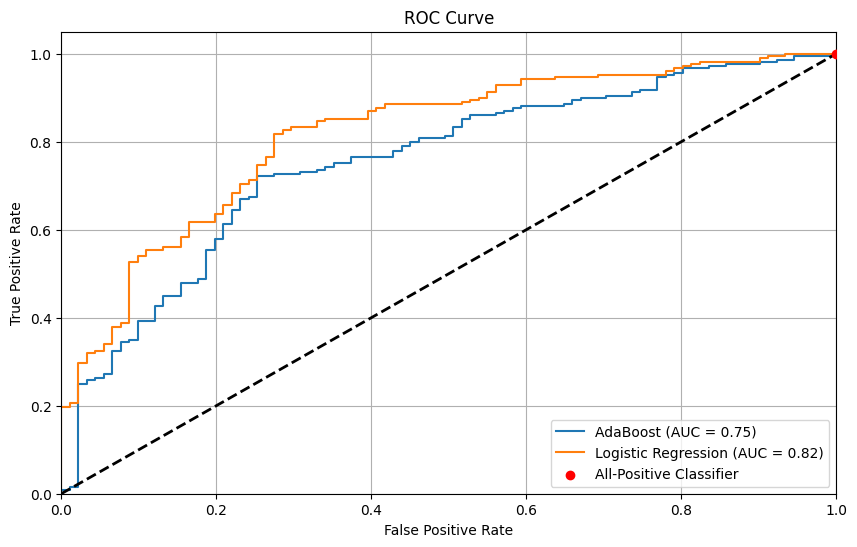

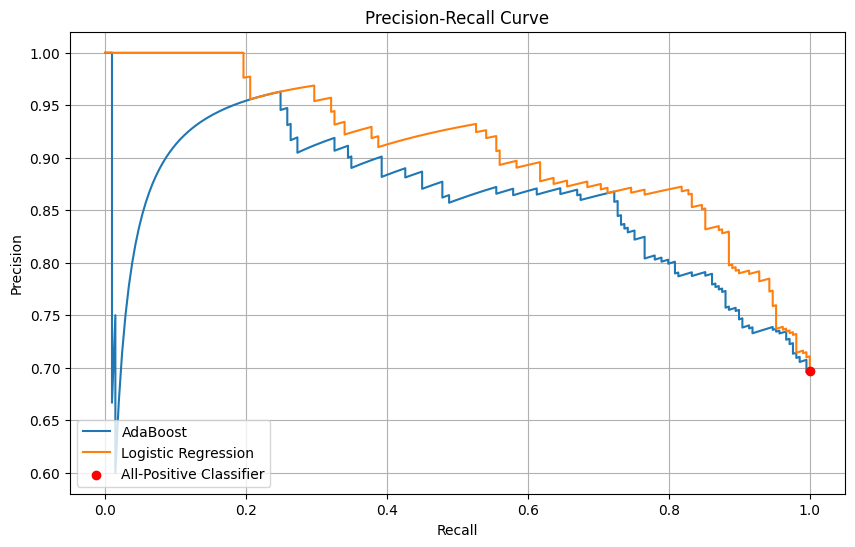

In [13]:
import openml
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Credit-G dataset
dataset = openml.datasets.get_dataset(31)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)


X = pd.get_dummies(X)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf_adaboost = AdaBoostClassifier(random_state=42)
clf_logreg = LogisticRegression(random_state=42, max_iter=1000)

clf_adaboost.fit(X_train, y_train)
clf_logreg.fit(X_train, y_train)


y_scores_adaboost = clf_adaboost.predict_proba(X_test)[:, 1]
y_scores_logreg = clf_logreg.predict_proba(X_test)[:, 1]


fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_scores_adaboost)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)


precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_scores_adaboost)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)


all_positive_precision = np.sum(y_test) / len(y_test)
all_positive_recall = 1.0
all_positive_fpr = 1.0
all_positive_tpr = 1.0


plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = {:.2f})'.format(auc(fpr_adaboost, tpr_adaboost)))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_logreg, tpr_logreg)))
plt.scatter(all_positive_fpr, all_positive_tpr, color='red', label='All-Positive Classifier', zorder=5)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)


plt.figure(figsize=(10, 6))
plt.plot(recall_adaboost, precision_adaboost, label='AdaBoost')
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.scatter(all_positive_recall, all_positive_precision, color='red', label='All-Positive Classifier', zorder=5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.show()


In [16]:
!pip install precision-recall-gain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for precision-recall-gain: filename=precision_recall_gain-0.1.1-cp310-cp310-linux_x86_64.whl size=14404 sha256=2c68c4315c7df27807f023323e4c4b1d5c6a3a12302e31953aae1d4e30a910ec
  Stored in directory: /root/.cache/pip/wheels/fc/7d/f4/bb9ce17c1f9cec2c9cc20d9b7771a3f65597794513a31668b2
Successfully built precision-recall-gain


<ipython-input-17-eb3103719c3f>:12: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(31)  # 'Credit-G' dataset
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

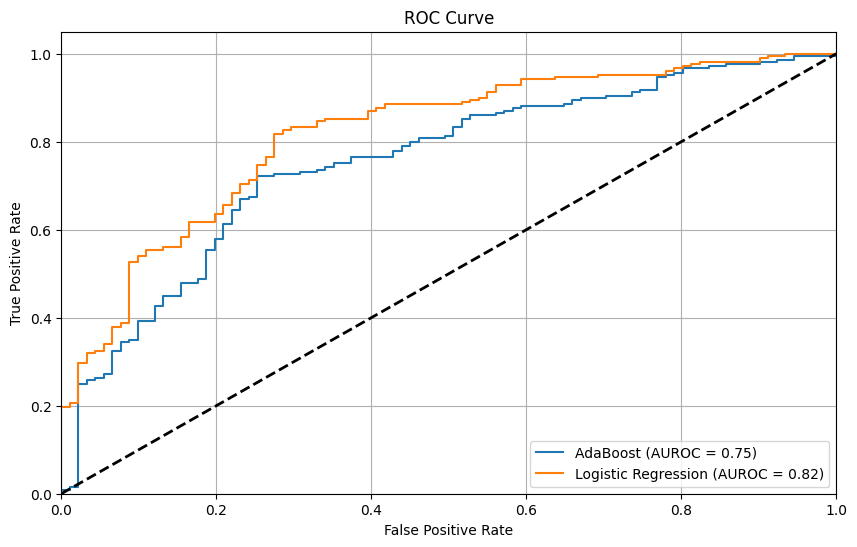

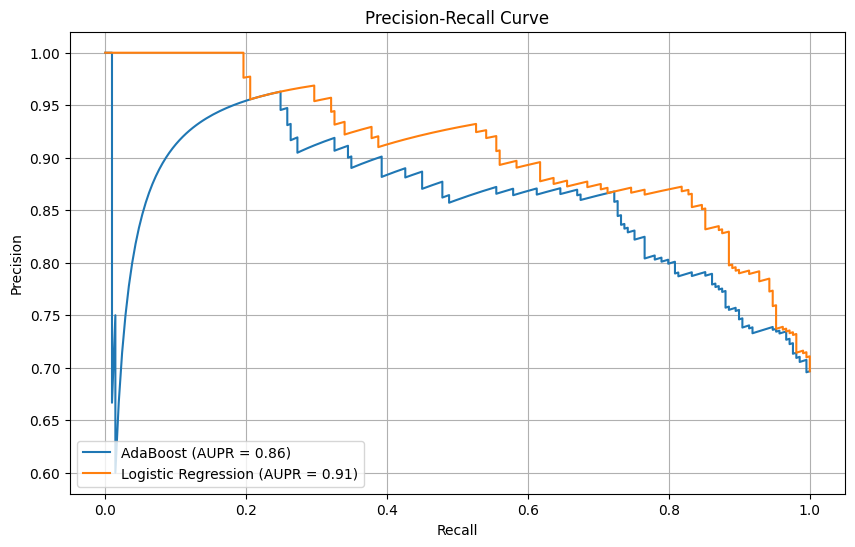

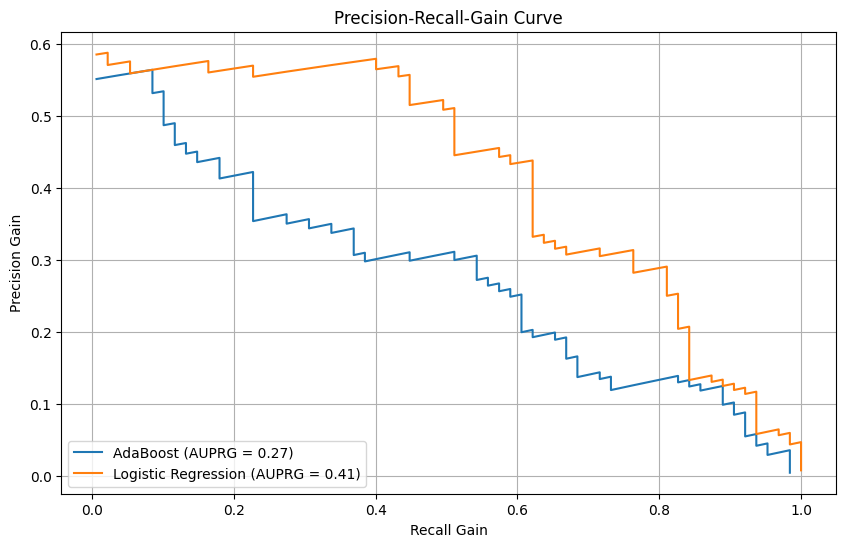

AdaBoost: AUROC = 0.75, AUPR = 0.86, AUPRG = 0.27
Logistic Regression: AUROC = 0.82, AUPR = 0.91, AUPRG = 0.41


In [17]:
import openml
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset from OpenML (Credit-G dataset as an example)
dataset = openml.datasets.get_dataset(31)  # 'Credit-G' dataset
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)


X = pd.get_dummies(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf_adaboost = AdaBoostClassifier(random_state=42)
clf_logreg = LogisticRegression(random_state=42, max_iter=1000)

clf_adaboost.fit(X_train, y_train)
clf_logreg.fit(X_train, y_train)

# predicted probabilities
y_scores_adaboost = clf_adaboost.predict_proba(X_test)[:, 1]
y_scores_logreg = clf_logreg.predict_proba(X_test)[:, 1]


fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_scores_adaboost)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)


precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_scores_adaboost)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)

auroc_adaboost = auc(fpr_adaboost, tpr_adaboost)
auroc_logreg = auc(fpr_logreg, tpr_logreg)
aupr_adaboost = auc(recall_adaboost, precision_adaboost)
aupr_logreg = auc(recall_logreg, precision_logreg)

# Function to calculate PRG curve and AUPRG
def calculate_prg(precision, recall, y_true):
    # Calculate proportion of positive instances
    pi = np.sum(y_true) / len(y_true)


    precision_gain = (precision - pi) / (1 - pi)
    recall_gain = (recall - pi) / (1 - pi)


    valid_indices = (precision_gain > 0) & (recall_gain > 0)
    precision_gain = precision_gain[valid_indices]
    recall_gain = recall_gain[valid_indices]


    auprg = auc(recall_gain, precision_gain)

    return precision_gain, recall_gain, auprg


precision_gain_adaboost, recall_gain_adaboost, auprg_adaboost = calculate_prg(precision_adaboost, recall_adaboost, y_test)
precision_gain_logreg, recall_gain_logreg, auprg_logreg = calculate_prg(precision_logreg, recall_logreg, y_test)


plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUROC = {:.2f})'.format(auroc_adaboost))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUROC = {:.2f})'.format(auroc_logreg))
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(recall_adaboost, precision_adaboost, label='AdaBoost (AUPR = {:.2f})'.format(aupr_adaboost))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression (AUPR = {:.2f})'.format(aupr_logreg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)


plt.figure(figsize=(10, 6))
plt.plot(recall_gain_adaboost, precision_gain_adaboost, label='AdaBoost (AUPRG = {:.2f})'.format(auprg_adaboost))
plt.plot(recall_gain_logreg, precision_gain_logreg, label='Logistic Regression (AUPRG = {:.2f})'.format(auprg_logreg))
plt.xlabel('Recall Gain')
plt.ylabel('Precision Gain')
plt.title('Precision-Recall-Gain Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.show()

print(f'AdaBoost: AUROC = {auroc_adaboost:.2f}, AUPR = {aupr_adaboost:.2f}, AUPRG = {auprg_adaboost:.2f}')
print(f'Logistic Regression: AUROC = {auroc_logreg:.2f}, AUPR = {aupr_logreg:.2f}, AUPRG = {auprg_logreg:.2f}')


The PRG curve provides a more linear interpolation and meaningful comparison of classifiers compared to traditional PR curves, as highlighted in the NIPS paper

# Question 3

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary
import pandas as pd

In [2]:
trainset = torchvision.datasets.FashionMNIST(root='./', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root='./', train=False, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:00<00:00, 115454469.37it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 2820700.02it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 36422770.19it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4473229.13it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [3]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True, num_workers=2,pin_memory=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=64, shuffle=False, num_workers=2,pin_memory=True)

In [4]:
class ConvModule(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(ConvModule, self).__init__()

        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

class InceptionModule(nn.Module):

    def __init__(self, in_channels, f_1x1, f_3x3):
        super(InceptionModule, self).__init__()

        self.branch1 = nn.Sequential(
            ConvModule(in_channels, f_1x1, kernel_size=1, stride=1, padding=0)
        )

        self.branch2 = nn.Sequential(
            ConvModule(in_channels, f_3x3, kernel_size=3, stride=1, padding=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        return torch.cat([branch1, branch2], 1)


class DownsampleModule(nn.Module):
    def __init__(self, in_channels, f_3x3):
        super(DownsampleModule, self).__init__()

        self.branch1 = nn.Sequential(ConvModule(in_channels, f_3x3, kernel_size=3, stride=2, padding=0))
        self.branch2 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        return torch.cat([branch1, branch2], 1)

class InceptionSmall(nn.Module):
    def __init__(self, num_classes = 10):
        super(InceptionSmall, self).__init__()

        self.conv1 = ConvModule(in_channels =1,out_channels=96, kernel_size=3, stride=1, padding=0)
        self.inception1 = InceptionModule(in_channels=96,f_1x1=32,f_3x3=32)
        self.inception2 = InceptionModule(in_channels=64,f_1x1=32,f_3x3=48)
        self.down1 = DownsampleModule(in_channels=80,f_3x3=80)
        self.inception3 = InceptionModule(in_channels=160,f_1x1=112,f_3x3=48)
        self.inception4 = InceptionModule(in_channels=160,f_1x1=96,f_3x3=64)
        self.inception5 = InceptionModule(in_channels=160,f_1x1=80,f_3x3=80)
        self.inception6 = InceptionModule(in_channels=160,f_1x1=48,f_3x3=96)
        self.down2 = DownsampleModule(in_channels=144,f_3x3=96)
        self.inception7 = InceptionModule(in_channels=240,f_1x1=176,f_3x3=160)
        self.inception8 = InceptionModule(in_channels=336,f_1x1=176,f_3x3=160)
        self.meanpool = nn.AdaptiveAvgPool2d((7,7))
        self.fc = nn.Linear(16464, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.down1(x)
        x = self.inception3(x)
        x = self.inception4(x)
        x = self.inception5(x)
        x = self.inception6(x)
        x = self.down2(x)
        x = self.inception7(x)
        x = self.inception8(x)
        x = self.meanpool(x)
        x = torch.flatten(x,1)
        x = self.fc(x)
        return x

In [5]:
def get_device():
  if torch.cuda.is_available():
      return torch.device('cuda')
  else:
      return torch.device('cpu')
device = get_device()
device

device(type='cuda')

In [6]:
def adjust_learning_rate(optimizer, epoch, batch, num_batches, total_epochs, initial_lr, final_lr):
    """Gradually increase the learning rate from initial_lr to final_lr over the course of total_epochs."""
    total_batches = total_epochs * num_batches  # Total number of batches over all epochs
    current_batch = epoch * num_batches + batch  # Current batch number
    lr = initial_lr + (final_lr - initial_lr) * (current_batch / total_batches)  # Linearly interpolate the LR

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

def eval_model(model,trainloader,testloader):
  model.eval()
  correct = 0
  total = 0
  for i, data in enumerate(testloader, 0):
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, dim=1)
    total += labels.size(0)
    correct += (preds == labels).sum().item()
  acc_v = (correct / total)

  correct = 0
  total = 0
  for i, data in enumerate(trainloader, 0):
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, dim=1)
    total += labels.size(0)
    correct += (preds == labels).sum().item()
  acc_t = (correct / total)
  return acc_t,acc_v

def fit(epochs, model, trainloader, testloader, optimizer, initial_lr, final_lr):
  history_t = []
  history_v = []
  history_lr = []
  num_batches = len(trainloader)
  step_count = 0
  criterion = nn.CrossEntropyLoss().to(device)
  for epoch in range(epochs):
    acc_t = 0.0  # Initialize training accuracy
    acc_v = 0.0  # Initialize validation accuracy
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)
      lrate = adjust_learning_rate(optimizer, epoch, i, num_batches, epochs, initial_lr, final_lr)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      step_count += 1
      if step_count%100==0:
        acc_t,acc_v = eval_model(model,trainloader,testloader)
        model.train()
        history_t.append(acc_t)
        history_v.append(acc_v)
        history_lr.append(lrate)
        log_ = str(step_count)+","+str(acc_t)+","+str(acc_v)+"\n"
        with open("model.log", "a")  as f:
          f.write(log_)
    print("Epoch {} | loss: {:.4f} | Train acc: {:.4f} | Val acc: {:.4f}".format(epoch+1, running_loss,acc_t, acc_v))

  return model,history_t,history_v, history_lr

In [7]:
net = InceptionSmall().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-9, momentum=0.0)
initial_lr = 1e-9
final_lr = 10

trained_model, history_t1, history_v1, history_lr1 = fit(5, net, trainloader, testloader, optimizer, initial_lr, final_lr)

Epoch 1 | loss: 1305.5247 | Train acc: 0.2141 | Val acc: 0.2137
Epoch 2 | loss: 2342.3171 | Train acc: 0.1000 | Val acc: 0.1000
Epoch 3 | loss: 2182.5190 | Train acc: 0.1000 | Val acc: 0.1000
Epoch 4 | loss: 2196.1287 | Train acc: 0.1000 | Val acc: 0.1000
Epoch 5 | loss: 2217.6950 | Train acc: 0.1000 | Val acc: 0.1000


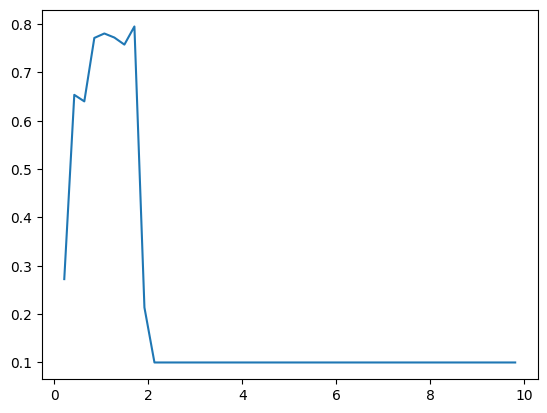

In [8]:
plt.plot(history_lr1, history_v1)
plt.show()

Based on the learning rates and accuracy plot above, It makes the most sense to use 1e-9 for lr_min and 1.0 for lr_max

In [10]:
def eval_model2(model, trainloader, testloader):
    model.eval()


    correct_v = 0
    total_v = 0
    running_loss_v = 0.0
    criterion = nn.CrossEntropyLoss().to(device)

    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss_v += loss.item()
            _, preds = torch.max(outputs, dim=1)
            total_v += labels.size(0)
            correct_v += (preds == labels).sum().item()

    acc_v = (correct_v / total_v)
    val_loss = running_loss_v / len(testloader)


    correct_t = 0
    total_t = 0
    running_loss_t = 0.0

    with torch.no_grad():
        for i, data in enumerate(trainloader, 0):
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss_t += loss.item()
            _, preds = torch.max(outputs, dim=1)
            total_t += labels.size(0)
            correct_t += (preds == labels).sum().item()

    acc_t = (correct_t / total_t)
    train_loss = running_loss_t / len(trainloader)

    return acc_t, acc_v, train_loss, val_loss

def fit2(epochs, model, trainloader, testloader, optimizer, scheduler):
    history_at = []  # Training accuracy history
    history_av = []  # Validation accuracy history
    history_lt = []  # Training loss history
    history_lv = []  # Validation loss history
    step_count = 0
    criterion = nn.CrossEntropyLoss().to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        model.train()  \

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            step_count += 1

            # Evaluate every 100 steps
            if step_count % 100 == 0:
                acc_t, acc_v, train_loss, val_loss = eval_model2(model, trainloader, testloader)
                history_at.append(acc_t)
                history_av.append(acc_v)
                history_lt.append(train_loss)
                history_lv.append(val_loss)
                log_ = f"{step_count},{acc_t},{acc_v},{train_loss},{val_loss}\n"
                with open("model.log", "a") as f:
                    f.write(log_)


        print(f"Epoch {epoch+1} | Loss: {running_loss:.4f} | Train acc: {acc_t:.4f} | Val acc: {acc_v:.4f} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")

        scheduler.step()


    return model, history_at, history_av, history_lt, history_lv



Epoch 1 | Loss: 2225.1382 | Train acc: 0.0777 | Val acc: 0.0770 | Train loss: 2.3720 | Val loss: 2.3735
Epoch 2 | Loss: 398.1554 | Train acc: 0.9000 | Val acc: 0.8864 | Train loss: 0.2736 | Val loss: 0.3202
Epoch 3 | Loss: 279.7987 | Train acc: 0.9133 | Val acc: 0.8937 | Train loss: 0.2353 | Val loss: 0.2878
Epoch 4 | Loss: 242.5783 | Train acc: 0.9201 | Val acc: 0.9032 | Train loss: 0.2134 | Val loss: 0.2630
Epoch 5 | Loss: 215.7607 | Train acc: 0.9281 | Val acc: 0.9071 | Train loss: 0.1956 | Val loss: 0.2500


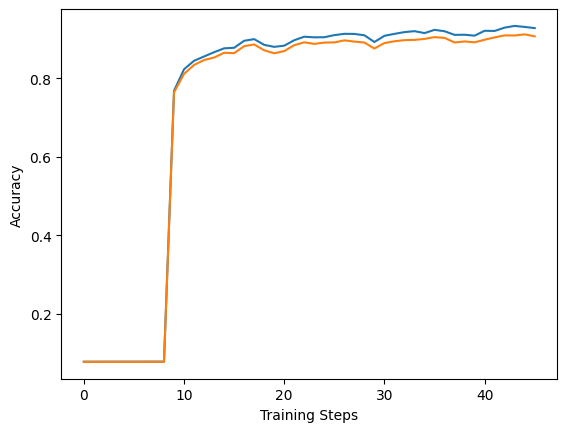

In [11]:
net = InceptionSmall().to(device)
optimizer = torch.optim.SGD(net.parameters(), initial_lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr = initial_lr, max_lr = 1.0, mode='exp_range')
trained_model2,history_at, history_av, history_lt, history_lv= fit2(5, net, trainloader, testloader, optimizer,scheduler)
plt.plot(list(history_at),label='Train')
plt.plot(list(history_av),label='Test')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.show()

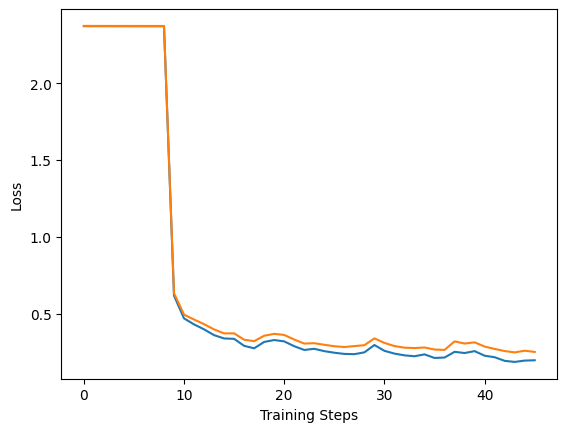

In [12]:
plt.plot(list(history_lt),label='Train')
plt.plot(list(history_lv),label='Test')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.show()

Incrementing batch size to 64
Step 100 | Batch size: 64 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.3625 | Val loss: 2.3622

Incrementing batch size to 128
Step 200 | Batch size: 128 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.3757 | Val loss: 2.3756

Incrementing batch size to 256
Step 300 | Batch size: 256 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.4584 | Val loss: 2.4578

Incrementing batch size to 512
Step 400 | Batch size: 512 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.3668 | Val loss: 2.3670

Incrementing batch size to 1024
Step 500 | Batch size: 1024 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.4081 | Val loss: 2.4080

Incrementing batch size to 2048
Step 600 | Batch size: 2048 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.3818 | Val loss: 2.3827

Incrementing batch size to 4096
Step 700 | Batch size: 4096 | Train acc: 0.1000 | Val acc: 0.1000 | Train loss: 2.4210 | Val loss: 2.4197

Step 800 | Batch size: 4096 | Train a

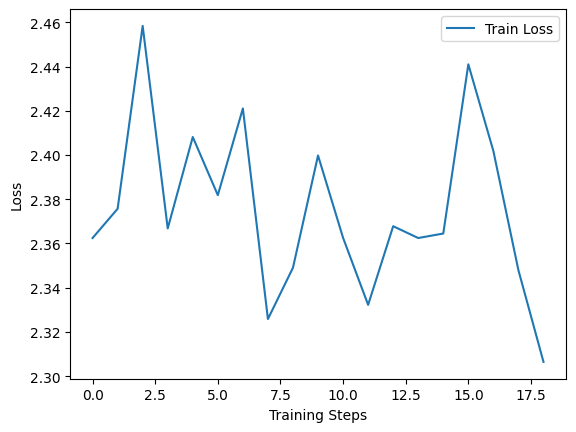

In [22]:


def fit_with_variable_batch_size(max_epochs, model, trainset, testset, lrmax, initial_batch_size=32, max_batch_size=4096, increment_step=1000):
    history_t = []
    history_v = []
    history_batch_size = []

    current_batch_size = initial_batch_size
    step_count = 0
    criterion = nn.CrossEntropyLoss().to(device)

    # Use a constant learning rate (lrmax) with SGD
    optimizer = torch.optim.SGD(model.parameters(), lr=lrmax, momentum=0.9)



    trainloader = torch.utils.data.DataLoader(trainset, batch_size=current_batch_size, shuffle=True, num_workers=2, pin_memory=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=current_batch_size, shuffle=False, num_workers=2, pin_memory=True)

    for epoch in range(max_epochs):
        running_loss = 0.0
        model.train()

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            step_count += 1

            if step_count % increment_step == 0 and current_batch_size < max_batch_size:
                current_batch_size *= 2  # Double the batch size
                trainloader = torch.utils.data.DataLoader(trainset, batch_size=current_batch_size, shuffle=True, num_workers=2, pin_memory=True)
                testloader = torch.utils.data.DataLoader(testset, batch_size=current_batch_size, shuffle=False, num_workers=2, pin_memory=True)
                print(f"Incrementing batch size to {current_batch_size}")


            if step_count % 100 == 0:
                acc_t, acc_v, train_loss, val_loss = eval_model2(model, trainloader, testloader)
                model.train()  # Return to training mode
                history_t.append((acc_t, train_loss))
                history_v.append((acc_v, val_loss))
                history_batch_size.append(current_batch_size)
                log_ = f"Step {step_count} | Batch size: {current_batch_size} | Train acc: {acc_t:.4f} | Val acc: {acc_v:.4f} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}\n"
                print(log_)
                with open("model.log", "a") as f:
                    f.write(log_)

        print(f"Epoch {epoch + 1} | loss: {running_loss:.4f} | Current Batch size: {current_batch_size}")

    return model, history_t, history_v, history_batch_size



trained_model, history_t1, history_v1, history_batch_size1 = fit_with_variable_batch_size(
    max_epochs=5,
    model=net,
    trainset=trainset,
    testset=testset,
    lrmax=0.99,
    initial_batch_size=32,
    max_batch_size=4096,
    increment_step=100
)


train_loss_history = [x[1] for x in history_t1]
plt.plot(train_loss_history, label='Train Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


3.3) As can be seen in the figure above, with our google collab runtime environment that offered 12.7Gb of GPU ram and 15Gb of GPU RAM, we had to top out our batch sizes at 4096. At that size, it does seem like there might be some slow convergence to lower loss rates, but generally the high learning rate is too unstable for incremental improvement as it dominates every gradient update and the gradient is likely not uniform in terms of direction over the large batch size-- leading to suboptimal performance. I do note that in theory there should be a trade off and larger batches should support higher learning rates. But in only five epochs to be consistent with the cyclical run above and such a high learning rate this does not appear to be the case.

# Question 4

4.1)

Problem 4.1)
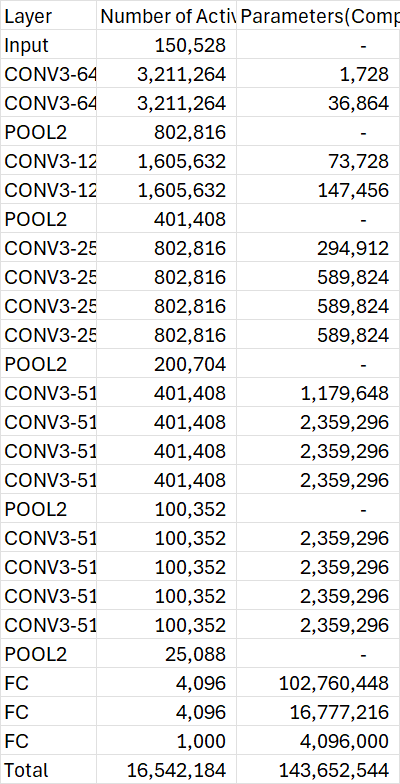

4.2)



a.   Generally, the inception model offers the ability to process information at multiple scales and extract multiple features while employing computational efficiency through parallelization and dimensionality reduction that together enable more expressive networks with lower resource cost.

b.   The output size is 32x32x672 for the naive version and 32x32x480 for the dimensionality reduction version.

c. The naive version has just over 300M total convolution operations, while the dimensionality reduction architecture has nearly half that-- with just over 155M total convolution operations



# Question Five






*   g[L1, 1]: 0 because it pulls initial weights for update 1
*   g[L1, 2]: 0 because it pulls weights from g[L1, 1] at time 1.
*   g[L1, 3]: 1 because it missed update from g[L2, 1]
*   g[L1, 4]: 0 because it pulls all weight updates that have been completed up to that point.
*   g[L2, 1]: 2 because is missed g[L1,1] and g[L1, 2]
*   g[L2, 2]: 2 because is missed g[L1,3] and g[L1, 4]







